![](http://api.ning.com/files/hiLZfGggQjMXa6qwLKdcZjiemO6gTzMhWvAcne1J0OjnhlfszP-VDRyE-xStKLvbpxiksKz2ed394ogvLs5RalfCnXXmD45H/DataScientistvsDecisionScientistDifferences.png)

# Comprensión del negocio

 **¿Cuál es el problema que se desea resolver?**

Se desea predecir la probabilidad de impago de los potenciales clientes.

## Librerías a utilizar

In [9]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
%matplotlib inline

In [30]:
os.chdir('F:/Carpeta Drive/Python/Base')

## Lectura de la base de datos

In [15]:
df=pd.read_excel('Churn.xls',sheet_name="churn")

In [20]:
df.head(5)

,Account Length,VMail Message,Day Mins,Eve Mins,Night Mins,Intl Mins,CustServ Calls,Churn,Int'l Plan,VMail Plan,...,Day Charge,Eve Calls,Eve Charge,Night Calls,Night Charge,Intl Calls,Intl Charge,State,Area Code,Phone
0,128,25,265.1,197.4,244.7,10.0,1,0,0,1,...,45.07,99,16.78,91,11.01,3,2.70,KS,415,382-4657
1,107,26,161.6,195.5,254.4,13.7,1,0,0,1,...,27.47,103,16.62,103,11.45,3,3.70,OH,415,371-7191
2,137,0,243.4,121.2,162.6,12.2,0,0,0,0,...,41.38,110,10.30,104,7.32,5,3.29,NJ,415,358-1921
3,84,0,299.4,61.9,196.9,6.6,2,0,1,0,...,50.90,88,5.26,89,8.86,7,1.78,OH,408,375-9999
4,75,0,166.7,148.3,186.9,10.1,3,0,1,0,...,28.34,122,12.61,121,8.41,3,2.73,OK,415,330-6626


In [23]:
df.isnull().any()

Account Length    False
VMail Message     False
Day Mins          False
Eve Mins          False
Night Mins        False
Intl Mins         False
CustServ Calls    False
Churn             False
Int'l Plan        False
VMail Plan        False
Day Calls         False
Day Charge        False
Eve Calls         False
Eve Charge        False
Night Calls       False
Night Charge      False
Intl Calls        False
Intl Charge       False
State             False
Area Code         False
Phone             False
dtype: bool

*No existe valores perdidos*

In [24]:
df=df.drop(['State','Area Code', 'Phone'], axis=1)

In [25]:
df.head(5)

,Account Length,VMail Message,Day Mins,Eve Mins,Night Mins,Intl Mins,CustServ Calls,Churn,Int'l Plan,VMail Plan,Day Calls,Day Charge,Eve Calls,Eve Charge,Night Calls,Night Charge,Intl Calls,Intl Charge
0,128,25,265.1,197.4,244.7,10.0,1,0,0,1,110,45.07,99,16.78,91,11.01,3,2.70
1,107,26,161.6,195.5,254.4,13.7,1,0,0,1,123,27.47,103,16.62,103,11.45,3,3.70
2,137,0,243.4,121.2,162.6,12.2,0,0,0,0,114,41.38,110,10.30,104,7.32,5,3.29
3,84,0,299.4,61.9,196.9,6.6,2,0,1,0,71,50.90,88,5.26,89,8.86,7,1.78
4,75,0,166.7,148.3,186.9,10.1,3,0,1,0,113,28.34,122,12.61,121,8.41,3,2.73


In [26]:
x=df.drop('Churn', axis =1)

In [27]:
y=df['Churn']

In [28]:
y.value_counts()

0    2850
1     483
Name: Churn, dtype: int64

Debido a que existe desbalanceo en la variable respuesta, se realizará un balanceo mediante la técnica de **Smote+ Tomek Link**

In [31]:
from imblearn.combine import SMOTETomek

In [32]:
smt = SMOTETomek(ratio='auto')

In [33]:
x_smt, y_smt = smt.fit_sample(x,y)

In [60]:
x_columns=x.columns

In [61]:
x_smt =pd.DataFrame(x_smt,columns=x_columns)
y_smt =pd.DataFrame(y_smt)
y_smt.columns=['Churn']

In [64]:
df= pd.concat([x_smt,y_smt],axis=1)

In [66]:
df.head(5)

,Account Length,VMail Message,Day Mins,Eve Mins,Night Mins,Intl Mins,CustServ Calls,Int'l Plan,VMail Plan,Day Calls,Day Charge,Eve Calls,Eve Charge,Night Calls,Night Charge,Intl Calls,Intl Charge,Churn
0,128.0,25.0,265.1,197.4,244.7,10.0,1.0,0.0,1.0,110.0,45.07,99.0,16.78,91.0,11.01,3.0,2.70,0
1,107.0,26.0,161.6,195.5,254.4,13.7,1.0,0.0,1.0,123.0,27.47,103.0,16.62,103.0,11.45,3.0,3.70,0
2,137.0,0.0,243.4,121.2,162.6,12.2,0.0,0.0,0.0,114.0,41.38,110.0,10.30,104.0,7.32,5.0,3.29,0
3,84.0,0.0,299.4,61.9,196.9,6.6,2.0,1.0,0.0,71.0,50.90,88.0,5.26,89.0,8.86,7.0,1.78,0
4,75.0,0.0,166.7,148.3,186.9,10.1,3.0,1.0,0.0,113.0,28.34,122.0,12.61,121.0,8.41,3.0,2.73,0


In [69]:
df.groupby('Churn')['Churn'].count()

Churn
0    2837
1    2837
Name: Churn, dtype: int64

In [70]:
df.isnull().any()

Account Length    False
VMail Message     False
Day Mins          False
Eve Mins          False
Night Mins        False
Intl Mins         False
CustServ Calls    False
Int'l Plan        False
VMail Plan        False
Day Calls         False
Day Charge        False
Eve Calls         False
Eve Charge        False
Night Calls       False
Night Charge      False
Intl Calls        False
Intl Charge       False
Churn             False
dtype: bool

In [151]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix , roc_curve, precision_score, recall_score

In [74]:
df_train, df_test = train_test_split(df, test_size=0.3, random_state=123)

In [91]:
print(df_train.shape)
print(df_test.shape)

(3971, 18)
(1703, 18)


### Random Forest

In [82]:
clf = RandomForestClassifier(n_estimators=30)

In [84]:
clf.fit(df_train[x_columns], df_train['Churn'])

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=30, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [102]:
score_clf =clf.score(df_test[x_columns],df_test['Churn'])

***Hacer Predicciones***

In [125]:
predictions_clf = clf.predict(df_test[x_columns])
probs_clf=clf.predict_proba(df_test[x_columns])

,Predicted False,Predicted True
Actual False,831,29
Actual True,40,803


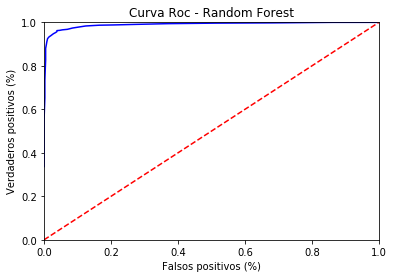

In [192]:
from sklearn.metrics import confusion_matrix , roc_curve, precision_score, recall_score
get_ipython().magic('matplotlib inline')
confusion_matrix = pd.DataFrame(confusion_matrix(df_test["Churn"], predictions_clf),
                                columns=["Predicted False", "Predicted True"],
                                index=["Actual False", "Actual True"])
display(confusion_matrix)

#Curva Roc
fp_rf, tp_rf , threshold= roc_curve(df_test['Churn'], probs_clf[:,1])
plt.title('Curva Roc - Random Forest')
plt.plot(fp_rf,tp_rf,'b')
plt.plot([0,1],[0,1],'r--')
plt.ylim([0,1])
plt.xlim([0,1])
plt.ylabel('Verdaderos positivos (%)')
plt.xlabel('Falsos positivos (%)')
plt.show()

In [148]:
p_clf=precision_score(df_test['Churn'],predictions_clf)
r_clf=recall_score(df_test['Churn'],predictions_clf)

In [156]:
print('La precisión global del modelo Random Forest es {}'.format(score_clf))
print('La precisión del modelo Random Forest es {}'.format(p_clf))
print('El recall del modelo Random Forest es {}'.format(r_clf))

La precisión global del modelo Random Forest es 0.9594832648267763
La precisión del modelo Random Forest es 0.9651442307692307
El recall del modelo Random Forest es 0.9525504151838672


### Regresión Logística

In [104]:
from sklearn.linear_model import LogisticRegression

In [105]:
lg = LogisticRegression()

In [106]:
lg.fit(df_train[x_columns], df_train['Churn'])

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [161]:
score_lg = lg.score(df_test[x_columns],df_test['Churn'])

***Hacer Predicciones***

In [158]:
predictions_lg = lg.predict(df_test[x_columns])
probs_lg=lg.predict_proba(df_test[x_columns])

,Predicted False,Predicted True
Actual False,647,213
Actual True,168,675


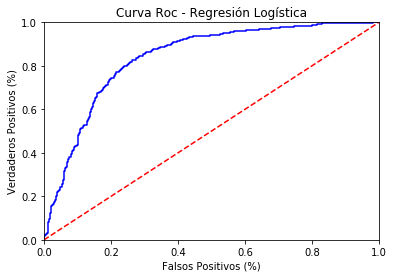

In [179]:
from sklearn.metrics import confusion_matrix , roc_curve, precision_score, recall_score
get_ipython().magic('matplotlib inline')
confusion_matrix = pd.DataFrame(confusion_matrix(df_test["Churn"], predictions_lg),
                                columns=["Predicted False", "Predicted True"],
                                index=["Actual False", "Actual True"])
display(confusion_matrix)

#Curva ROC
fpr, tpr, threshold = roc_curve(df_test['Churn'],probs_lg[:,1])
plt.title('Curva Roc - Regresión Logística')
plt.plot(fpr, tpr, 'b')
plt.plot([0,1], [0,1],'r--')
plt.xlim([0,1])
plt.ylim([0,1])
plt.ylabel('Verdaderos Positivos (%)')
plt.xlabel('Falsos Positivos (%)')
plt.show()


In [154]:
p_lg=precision_score(df_test['Churn'],predictions_lg)
r_lg=recall_score(df_test['Churn'],predictions_lg)

In [157]:
print('La precisión global del modelo Logístico es {}'.format(score_lg))
print('La precisión del modelo Logístico es {}'.format(p_lg))
print('El recall del modelo Logístico es {}'.format(r_lg))

La precisión global del modelo Logístico es 0.7762771579565473
La precisión del modelo Logístico es 0.7601351351351351
El recall del modelo Logístico es 0.800711743772242
